In [1]:
import warnings

In [2]:
# !pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance = pd.read_csv("insurance.csv")

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.shape

(1338, 7)

In [7]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance.duplicated().any()

True

In [11]:
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [12]:
insurance_1=insurance.drop_duplicates()

In [13]:
insurance_1.shape

(1337, 7)

In [14]:
insurance_1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [15]:
insurance_1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
Numerical_columns = insurance_1.select_dtypes(include='number').columns.to_list()
Categorical_columns = insurance_1.select_dtypes(exclude='number').columns.to_list()
print(f'Numberical columns in the data:{Numerical_columns}')
print(f'Categorical columns in the data:{Categorical_columns}')

Numberical columns in the data:['age', 'bmi', 'children', 'charges']
Categorical columns in the data:['sex', 'smoker', 'region']


In [17]:
insurance_1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
insurance_1.describe(exclude='number')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [19]:
insurance_1['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [20]:
insurance_1['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [21]:
insurance_1['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### Data Visualizations

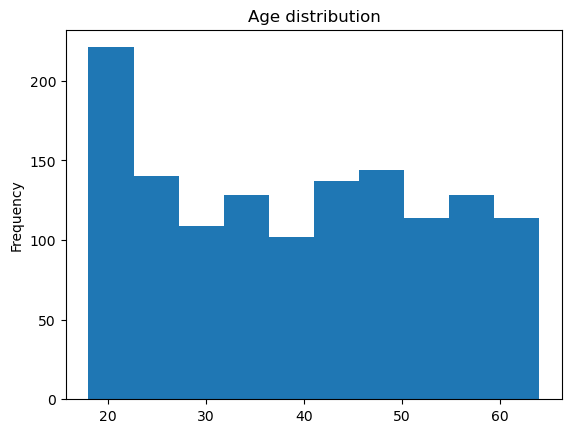

In [22]:
insurance_1['age'].plot(kind = 'hist')
plt.title('Age distribution')
plt.show()

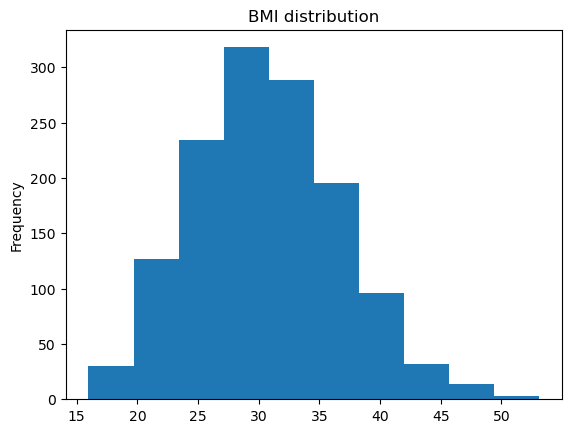

In [23]:
insurance_1['bmi'].plot(kind = 'hist')
plt.title('BMI distribution')
plt.show()

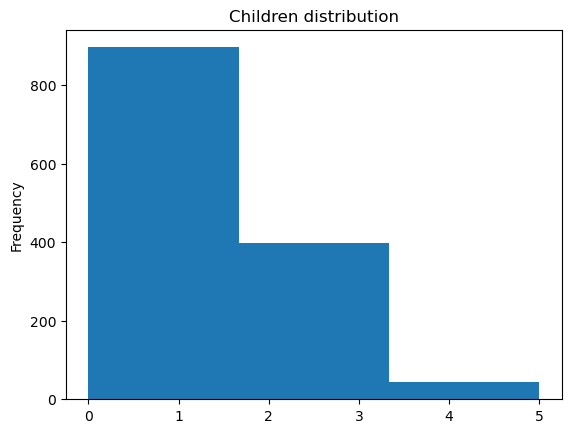

In [24]:
insurance_1['children'].plot(kind = 'hist',bins=3)
plt.title('Children distribution')
plt.show()

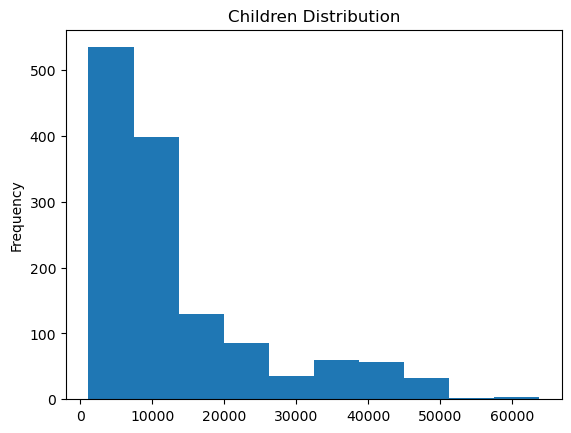

In [25]:
insurance_1['charges'].plot(kind='hist')
plt.title('Children Distribution')
plt.show()

<Axes: xlabel='children'>

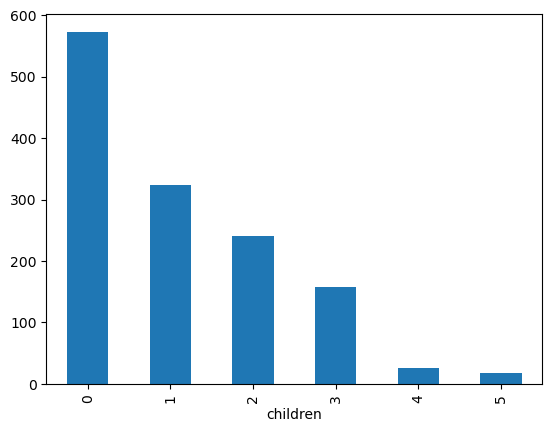

In [26]:
insurance_1['children'].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

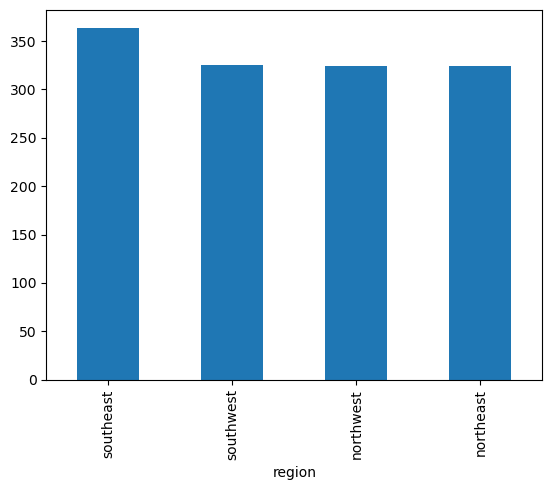

In [27]:
insurance_1['region'].value_counts().plot(kind='bar')

<Axes: xlabel='sex'>

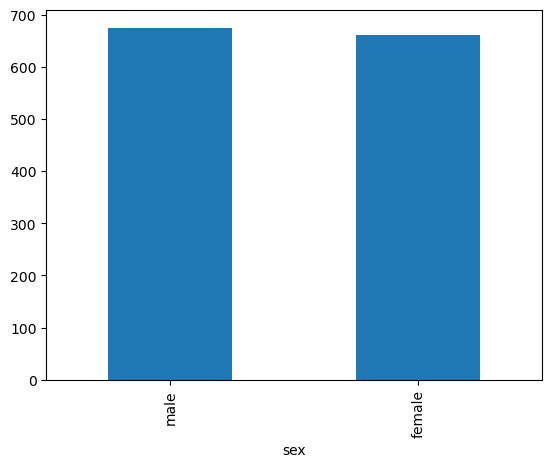

In [28]:
insurance_1['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

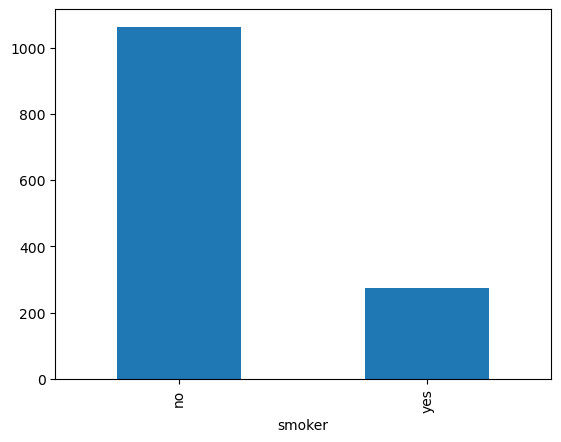

In [29]:
insurance_1['smoker'].value_counts().plot(kind='bar')

### Box plot Numerical columns

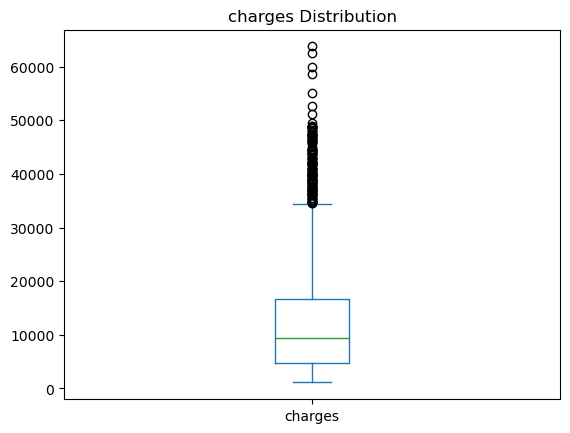

In [30]:
insurance_1['charges'].plot(kind='box')
plt.title("charges Distribution")
plt.show()

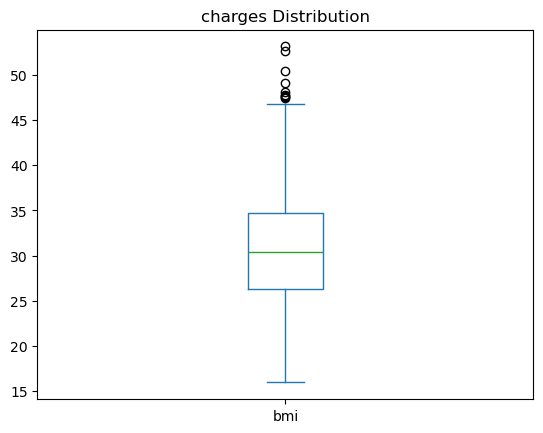

In [31]:
insurance_1['bmi'].plot(kind='box')
plt.title("charges Distribution")
plt.show()

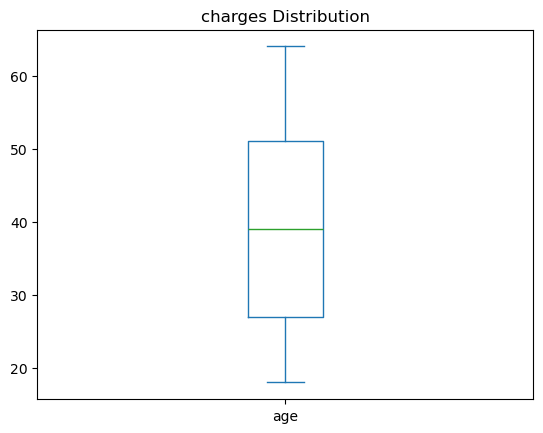

In [32]:
insurance_1['age'].plot(kind='box')
plt.title("charges Distribution")
plt.show()

### pie Chart Region

In [33]:
region_count = insurance_1['region'].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

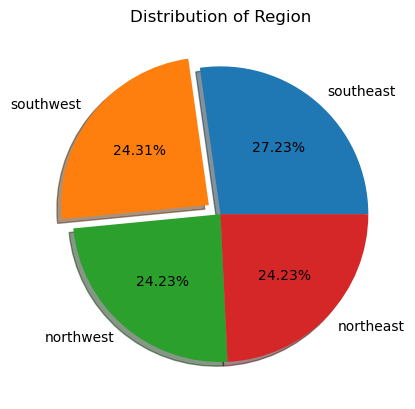

In [34]:
plt.pie(
    x=region_count.values,
    labels=region_count.index,
    shadow=True,
    autopct='%.2f%%',
    explode=(0, 0.1, 0, 0)
)

plt.title('Distribution of Region')
plt.show()

### Correlation matrix

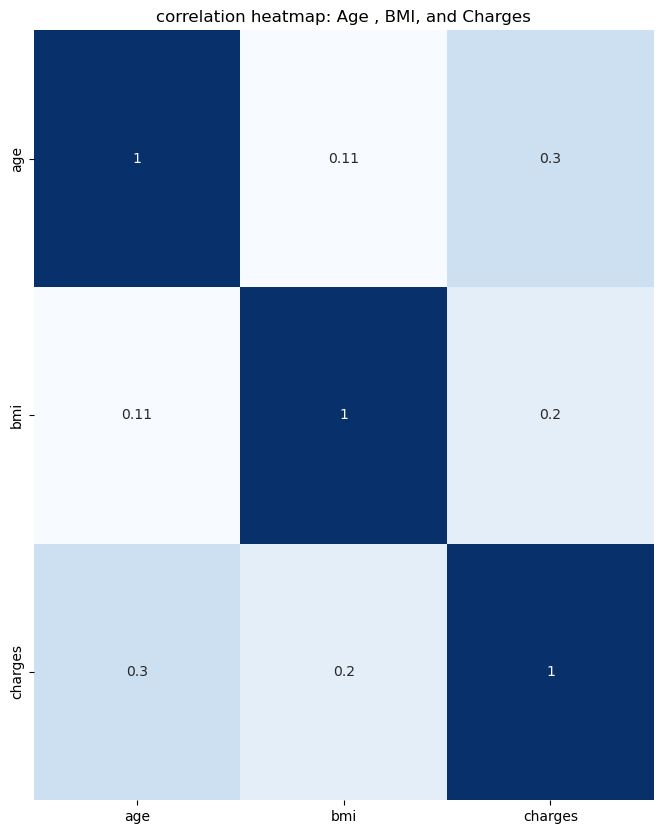

In [35]:
corr_data = insurance_1[['age','bmi','charges']].corr()

plt.figure(figsize=(8,10))
sns.heatmap(round(corr_data, 2), annot=True, cmap='Blues', cbar=False)
plt.title('correlation heatmap: Age , BMI, and Charges')
plt.show()

### Scatter plot

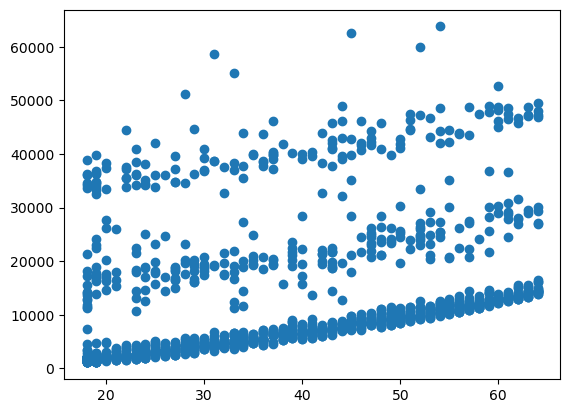

In [36]:
plt.scatter(data=insurance_1,x= 'age', y='charges')

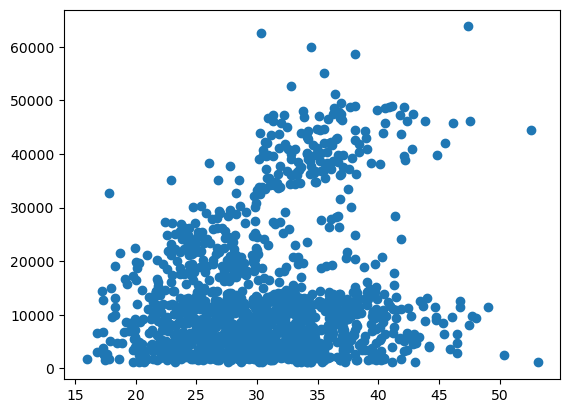

In [37]:
plt.scatter(data=insurance_1,x= 'bmi', y='charges')

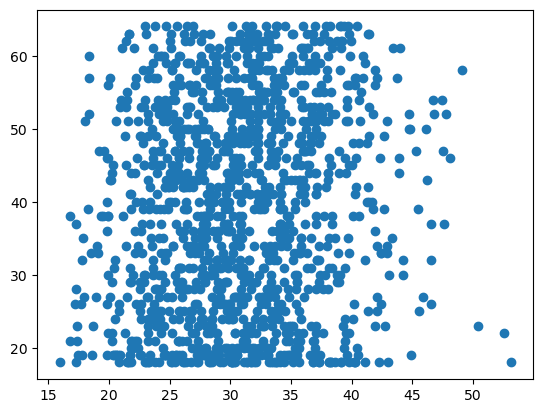

In [38]:
plt.scatter(data=insurance_1,x= 'bmi', y='age')

### Insurance cost for smoker and non smoker

In [39]:
insurance_smoker=insurance_1.groupby('smoker')['charges'].mean().reset_index()
insurance_smoker

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker'>

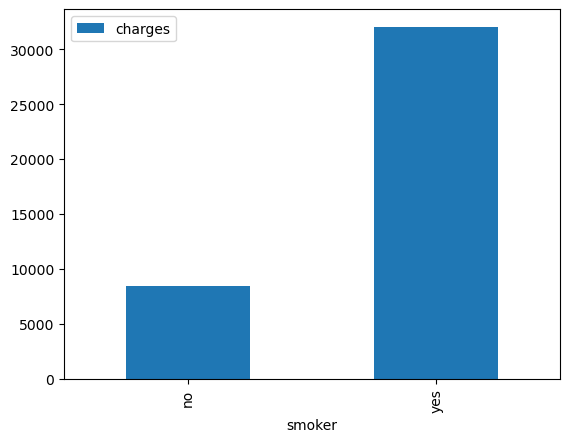

In [40]:
insurance_smoker.plot(kind='bar',x = 'smoker', y='charges')

### Insurance cost for Male and Female

In [41]:
insurance_gender = insurance_1.groupby("sex")['charges'].mean().reset_index()
insurance_gender

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

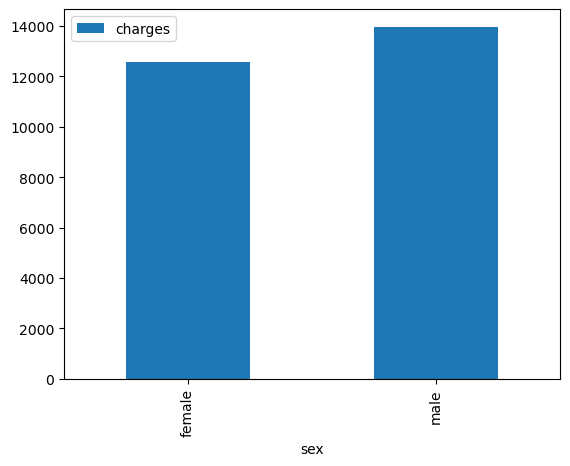

In [42]:
insurance_gender.plot(kind= 'bar', x='sex', y='charges')

### Region wise insurance cost

In [43]:
insurance_region= insurance_1.groupby('region')['charges'].mean().reset_index()
insurance_region

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region'>

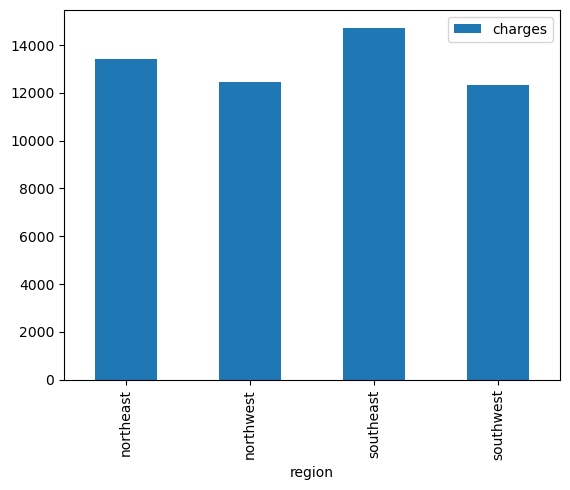

In [44]:
insurance_region.plot(kind='bar',x='region',y='charges')

### Region wisw BMI

In [45]:
insurance_region_bmi = insurance_1.groupby('region')['bmi'].mean().reset_index()
insurance_region_bmi

,region,bmi
0,northeast,29.173503
1,northwest,29.195494
2,southeast,33.355989
3,southwest,30.596615


<Axes: xlabel='region'>

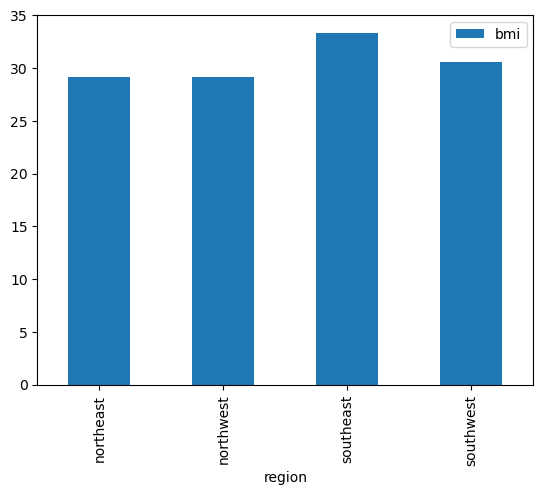

In [46]:
insurance_region_bmi.plot(kind='bar', x='region',y='bmi')

### Region wise Male and Female and cost

In [47]:
pd.crosstab(insurance_1.region, insurance_1.sex).count()

sex
female    4
male      4
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
insurance_1.loc[:, 'sex'] = le.fit_transform(insurance_1['sex'])
insurance_1.loc[:, 'smoker'] = le.fit_transform(insurance_1['smoker'])
insurance_1.loc[:, 'region'] = le.fit_transform(insurance_1['region'])

In [50]:
x= insurance_1.drop(columns=['charges'],axis=1)
y= insurance_1['charges']

In [51]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [52]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=42, shuffle=True)

print(f'the shape of x trian: {x_train.shape}')
print(f'the shape of y trian: {y_train.shape}')

print('*'*30)

print(f'the shape of x test: {x_test.shape}')
print(f'the shape of y train: {y_test.shape}')

the shape of x trian: (935, 6)
the shape of y trian: (935,)
******************************
the shape of x test: (402, 6)
the shape of y train: (402,)


### Features Scalling

In [55]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [56]:
x['age'] = std_scaler.fit_transform(np.array(x['age']).reshape(-1,1))
x['bmi'] = std_scaler.fit_transform(np.array(x['bmi']).reshape(-1,1))
x['children'] = std_scaler.fit_transform(np.array(x['children']).reshape(-1,1))

In [57]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lear_reg= LinearRegression()

In [60]:
lear_reg.fit(x_train,y_train)

LinearRegression()

In [61]:
from sklearn.model_selection import cross_val_score,cross_validate

In [62]:
result = cross_validate(lear_reg, x,y, cv = 5, return_train_score=True, scoring='r2')
result

{'fit_time': array([0.06483293, 0.00800681, 0.        , 0.        , 0.01562738]),
 'score_time': array([0.00800204, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.76123487, 0.70840689, 0.77720769, 0.73365562, 0.7551376 ]),
 'train_score': array([0.74737531, 0.75930033, 0.74326474, 0.75468466, 0.74915469])}

In [63]:
train_acc= result['train_score'].mean() *100
print('Training Accuracy =',round(train_acc,2), '%')

Training Accuracy = 75.08 %


In [64]:
test_acc= result['test_score'].mean() *100
print('Testing Accuracy =',round(test_acc,2), '%')

Testing Accuracy = 74.71 %


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
models = []
models.append(('Linear Regresssion', LinearRegression()))
models.append(('Knn', KNeighborsRegressor()))
models.append(('Decision Tree',DecisionTreeRegressor()))
models.append(('Random Forest',RandomForestRegressor()))
for model in models:
    result = cross_validate(model[1],x,y, cv=5, return_train_score=True, scoring = 'r2')
    print(model[0])
    train_acc=round((result['train_score'].mean()) * 100,2)
    test_acc=round((result['test_score'].mean()) * 100,2)
    print(f'train R2 score: {train_acc}')
    print(f'Test R2 score: {test_acc}')
    print('\n')

Linear Regresssion
train R2 score: 75.08
Test R2 score: 74.71


Knn
train R2 score: 81.44
Test R2 score: 68.87


Decision Tree
train R2 score: 99.9
Test R2 score: 71.46


Random Forest
train R2 score: 97.66
Test R2 score: 83.41




### RandomForest Hyperparameter Turning Using Randomsearch

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [68]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5,10],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True,False]
}

random_search = RandomizedSearchCV(
    param_distributions=params,
    estimator=RandomForestRegressor(),
    cv=5,
    return_train_score=True,
    scoring='r2',
    n_jobs=-1
)


In [69]:
random_search.fit(x,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='r2')

In [70]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'bootstrap': True}

In [71]:
random_search.cv_results_['mean_train_score'].mean() *100

92.43725868228576

In [72]:
random_search.cv_results_['mean_test_score'].mean() *100

82.39426675314971

In [73]:
Rf=RandomForestRegressor(n_estimators=100,
                         min_samples_split=5,
                         min_samples_leaf=2,max_depth=5,
                         bootstrap=True)

In [74]:
Rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [75]:
from sklearn.metrics import r2_score

In [76]:
predicted_train=Rf.predict(x_train)
train_score=r2_score(y_true=y_train,y_pred=predicted_train)
predicted_test=Rf.predict(x_test)
test_score=r2_score(y_true=y_test,y_pred=predicted_test)
print(f'R squared (R^2) for training Data using Random Forest: {round(train_score,2)*100}%')
print(f'R squared (R^2) for testing Data using Random Forest: {round(test_score,2)*100}%')

R squared (R^2) for training Data using Random Forest: 88.0%
R squared (R^2) for testing Data using Random Forest: 87.0%


### Scatter plot with a Regression Line

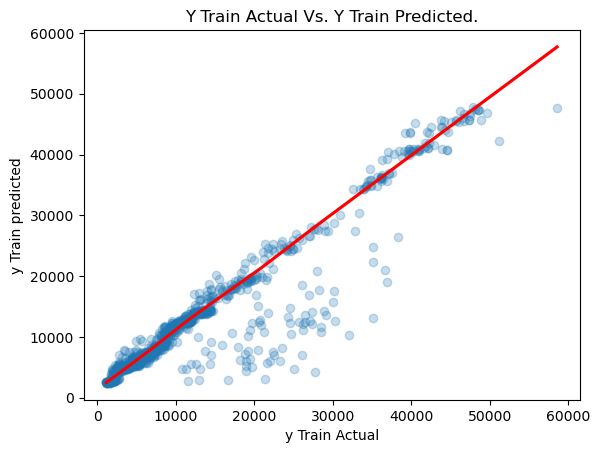

In [77]:
sns.regplot(x=y_train, y=predicted_train,
           lowess=True,
           line_kws={'color':'red'},
           scatter_kws ={'alpha':0.25})

plt.title('Y TRAIN ACTUAL VS. Y TRAIN PREDICTED.'. title())
plt.xlabel('y Train Actual')
plt.ylabel('y Train predicted')
plt.show()

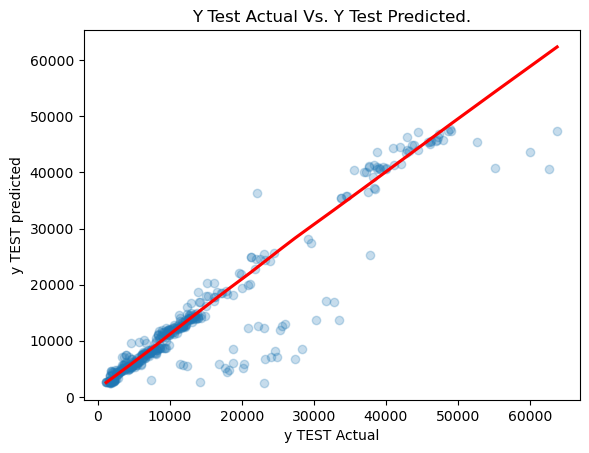

In [78]:
sns.regplot(x=y_test, y=predicted_test,
           lowess=True,
           line_kws={'color':'red'},
           scatter_kws ={'alpha':0.25})

plt.title('Y TEST ACTUAL VS. Y TEST PREDICTED.'. title())
plt.xlabel('y TEST Actual')
plt.ylabel('y TEST predicted')
plt.show()

In [79]:
x

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,-0.909234,1,3
1,-1.511647,1,0.509422,-0.079442,0,2
2,-0.799350,1,0.383155,1.580143,0,2
3,-0.443201,1,-1.305052,-0.909234,0,1
4,-0.514431,1,-0.292456,-0.909234,0,1
...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1
1334,-1.511647,0,0.206053,-0.909234,0,0
1335,-1.511647,0,1.014490,-0.909234,0,2
1336,-1.297958,0,-0.797524,-0.909234,0,3


In [80]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

### Customized prediction

In [81]:
age=24
sex=1
bmi=35
children=3
smoker=1
region=3

In [82]:
age1=std_scaler.transform([[24]])
bmi1=std_scaler.transform([[35]])
cld1=std_scaler.transform([[3]])

In [83]:
age1=std_scaler.transform([[24]])
age1[0][0]

19.005786868390853

In [84]:
print(age1)
print(bmi1)
print(cld1)

[[19.00578687]]
[[28.13350484]]
[[1.58014347]]


In [85]:
Rf.predict([[age1[0][0], sex, bmi1[0][0], cld1[0][0], smoker, region]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([17830.81331688])